### Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Function to generate random sample data from a given distribution

In [5]:
def gen_data(n_sample=50,dist='uniform',random_var=0):
    """
    Generates data points for a desired distributions and return as numpy array
    """
    
    if dist=='uniform':
        d=np.random.random(size=n_sample)
    if dist=='normal':
        d=np.random.normal(loc=1-random_var,scale=1+random_var,size=n_sample)
    if dist=='binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,size=n_sample)
    if dist=='exponential':
        d=np.random.exponential(scale=0.5+random_var,size=n_sample)
    if dist=='poisson':
        d=np.random.poisson(lam=1.0+random_var,size=n_sample)
    if dist=='chisquare':
        d=np.random.chisquare(df=3+int(5*random_var),size=n_sample)
    if dist=='gamma':
        d=np.random.gamma(shape=1.0+random_var,scale=0.5+random_var,size=n_sample)
    if dist=='beta':
        d=np.random.beta(a=0.5+random_var,b=1.0+random_var,size=n_sample)
    if dist=='triangular':
        d=np.random.triangular(left=0.0,mode=np.min([0.5+random_var,1.0]),right=1.0,size=n_sample)
    if dist=='lognormal':
        d=np.random.lognormal(mean=1-random_var,sigma=1+random_var,size=n_sample)
    if dist=='laplace':
        d=np.random.laplace(scale=0.5+random_var,size=n_sample)
        
    # Normalize data
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d

### Kernel density plots and histograms to test the generative function

c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
c:\programdata\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs [

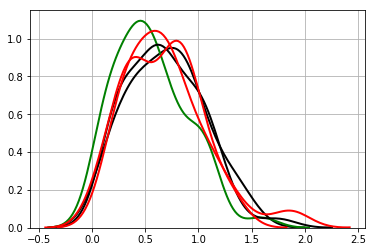

In [6]:
for r in [0.1,0.2,0.3,0.4,0.5]:
    test=gen_data(dist='beta',random_var=r)+gen_data(dist='exponential',random_var=r)
    sns.kdeplot(test,lw=2,c=np.random.choice(['k','orange','blue','green','red']))
    plt.grid(True)
plt.show()

In [7]:
dist_list=['uniform','normal','binomial','exponential','poisson','chisquare','gamma','beta','triangular','lognormal','laplace']

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


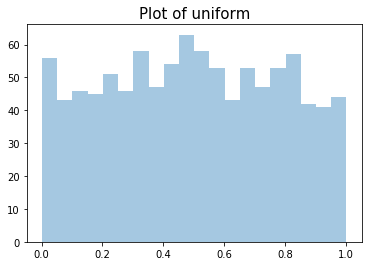

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


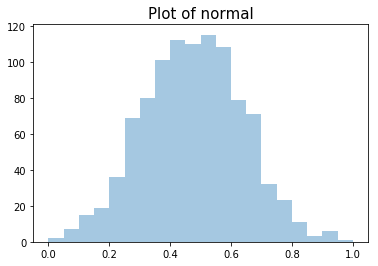

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


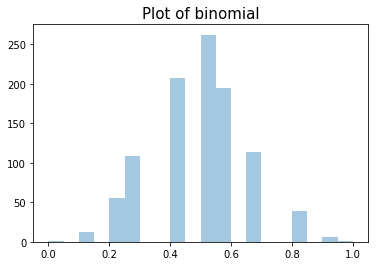

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


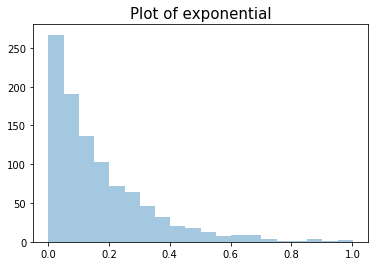

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


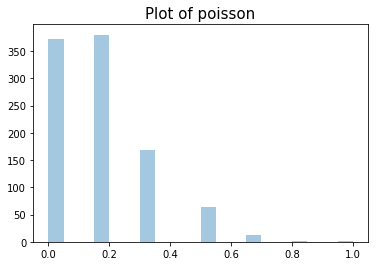

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


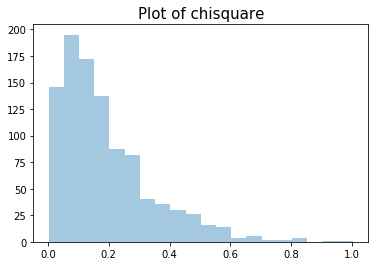

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


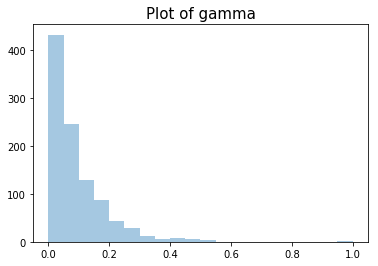

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


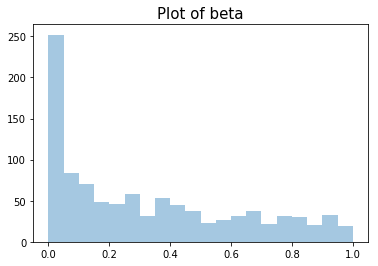

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


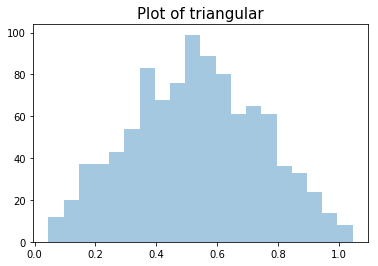

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


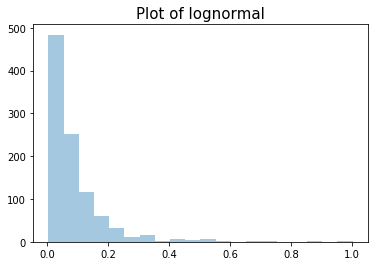

c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


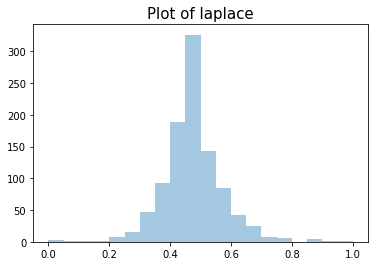

In [79]:
for d in dist_list:
    data = gen_data(n_sample=1000,dist=d)
    plt.title(f"Plot of {d}",fontsize=15)
    sns.distplot(data,kde=False,bins=20)
    plt.show()

### Function to generate data sets with various distributions and put them in a DataFrame

In [9]:
def gen_dist_df(n_input=5,n_sample=200,bins=10):
    """
    Generates randomized data sets calling gen_data with various distributions and put them in a DataFrame
    """
    import pandas as pd
    
    df_data={}
    df_data['Data']=[]
    df_data['Histogram']=[]
    df_data['Type']=[]
    dist_list=['uniform','normal','binomial','exponential','poisson','chisquare',\
               'gamma','beta','triangular','lognormal','laplace']
    for i in range(n_input):
        r=np.random.random()
        dist=np.random.choice(dist_list)
        d=gen_data(n_sample=n_sample,dist=dist,random_var=r)
        d=d.reshape(n_sample,)
        df_data['Data'].append(d)
        # Add histogram bin array after range scaling
        hist=np.histogram(d,bins=bins)[0]
        bins=len(hist)
        hist=(hist-hist.min())/(hist.max()-hist.min())
        # Reshape for proper input dimension to the NN
        hist=hist.reshape(bins,)
        df_data['Histogram'].append(hist)
        df_data['Type'].append(dist)
        
    df_data=pd.DataFrame(df_data)
        
    return df_data

### Testing

In [57]:
n_input=1000
n_sample=500
n_bins=25
n_class=11

In [58]:
df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=n_bins)

In [59]:
df.head()

,Data,Histogram,Type
0,"[0.6840672725687309, 0.29297874110662825, 0.64...","[0.0, 0.0, 0.022727272727272728, 0.11363636363...",triangular
1,"[0.11552902553682143, 0.14235503512560524, 0.0...","[1.0, 0.1111111111111111, 0.03864734299516908,...",lognormal
2,"[0.2181608818686727, 0.35838145987440856, 0.03...","[0.45555555555555555, 1.0, 0.8666666666666667,...",gamma
3,"[0.0, 0.14285714285714285, 0.14285714285714285...","[0.5864197530864198, 0.0, 0.0, 1.0, 0.0, 0.0, ...",poisson
4,"[0.875, 1.25, 1.25, 0.75, 0.875, 0.625, 1.125,...","[0.1, 0.0, 0.0, 0.3923076923076923, 0.0, 0.0, ...",binomial


In [60]:
df['Data'][0].shape

(500,)

## Neural Network

In [13]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Preparing the training data vectors

In [14]:
y=df['Type']
num_classes = len(df['Type'].unique())
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
y = keras.utils.to_categorical(encoded_y,num_classes=num_classes)

In [15]:
X=[]
for i in range(n_input):
    X.append(df['Histogram'][i])

In [16]:
X=np.array(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [37]:
X_train[:5]

array([[1.        , 0.8       , 0.5       , 0.525     , 0.35      ,
        0.45      , 0.25      , 0.45      , 0.3       , 0.325     ,
        0.35      , 0.15      , 0.175     , 0.125     , 0.15      ,
        0.225     , 0.1       , 0.2       , 0.125     , 0.075     ,
        0.125     , 0.075     , 0.025     , 0.025     , 0.        ],
       [0.07692308, 0.        , 0.23076923, 0.02564103, 0.20512821,
        0.28205128, 0.23076923, 0.58974359, 0.28205128, 0.61538462,
        0.48717949, 0.64102564, 0.48717949, 0.8974359 , 1.        ,
        0.61538462, 0.61538462, 0.43589744, 0.64102564, 0.58974359,
        0.38461538, 0.1025641 , 0.05128205, 0.02564103, 0.1025641 ],
       [0.25423729, 0.59322034, 0.93220339, 0.93220339, 1.        ,
        0.84745763, 0.79661017, 0.57627119, 0.38983051, 0.57627119,
        0.38983051, 0.3220339 , 0.11864407, 0.27118644, 0.08474576,
        0.13559322, 0.06779661, 0.01694915, 0.05084746, 0.01694915,
        0.03389831, 0.01694915, 0.01694915, 0.

In [39]:
y_train[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
input_dim=X.shape[1]
output_dim=num_classes

### Hyperparameters
* Number of layers
* Neurons
* Dropout rate
* Activation function
* Epochs
* Batch size

### Function to build a neural net model in keras

In [92]:
def build_NN_model(input_dim,num_classes,n_hidden_layers=1,layer_architecture=None,dropout_prob=0.25,activation_func='relu'):
    """
    Builds and returns a feed-forward multi-layer neural network
    n_hidden_layers: Number of hidden layers
    layer_architecture: Nuerons per hidden layer, must be a list with neurons per layer
                        e.g. [10,5] and length must match the number of layers
    """
    model = Sequential()
    model.add(Dense(layer_architecture[0], input_shape=(input_dim,),activation='relu'))
    if len(layer_architecture)>1:
        for i in layer_architecture[1:]:
            model.add(Dense(i, activation='relu'))
            model.add(Dropout(rate=dropout_prob))
    model.add(Dense(num_classes, activation='softmax'))
    #print(model.summary())
    return model

In [83]:
model=build_NN_model(input_dim=input_dim,n_hidden_layers=2,layer_architecture=[10,10])

### Optimizer, learning rate, and error metric

In [84]:
#neuron_layer_1=20
#neuron_layer_2=10
#dropout_prob=0.25
#activation_func='relu'
num_epochs=200
batch_size=32
learning_rate=0.001

In [85]:
optimizer=keras.optimizers.adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

### Training the model

In [86]:
from keras.callbacks import ModelCheckpoint   

# save best model as checkpointer
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, 
                               save_best_only=True)
# train the model
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
          validation_data=(X_val, y_val), callbacks=[checkpointer], 
          verbose=1, shuffle=False)

Train on 300 samples, validate on 100 samples
Epoch 1/200
300/300 [==============================] - 3s 10ms/step - loss: 2.3674 - acc: 0.1433 - val_loss: 2.3174 - val_acc: 0.2200
Epoch 2/200
300/300 [==============================] - 0s 183us/step - loss: 2.3085 - acc: 0.2000 - val_loss: 2.2745 - val_acc: 0.2700
Epoch 3/200
300/300 [==============================] - 0s 114us/step - loss: 2.2776 - acc: 0.2133 - val_loss: 2.2348 - val_acc: 0.2700
Epoch 4/200
300/300 [==============================] - 0s 130us/step - loss: 2.2432 - acc: 0.2400 - val_loss: 2.1944 - val_acc: 0.2600
Epoch 5/200
300/300 [==============================] - 0s 120us/step - loss: 2.1987 - acc: 0.2800 - val_loss: 2.1491 - val_acc: 0.2700
Epoch 6/200
300/300 [==============================] - 0s 130us/step - loss: 2.1715 - acc: 0.2900 - val_loss: 2.1023 - val_acc: 0.2800
Epoch 7/200
300/300 [==============================] - 0s 164us/step - loss: 2.1315 - acc: 0.2667 - val_loss: 2.0477 - val_acc: 0.3200
Epoch 8/20

Epoch 61/200
300/300 [==============================] - 0s 147us/step - loss: 0.7042 - acc: 0.7033 - val_loss: 0.4804 - val_acc: 0.8500
Epoch 62/200
300/300 [==============================] - 0s 164us/step - loss: 0.6796 - acc: 0.7533 - val_loss: 0.4678 - val_acc: 0.8800
Epoch 63/200
300/300 [==============================] - 0s 160us/step - loss: 0.7108 - acc: 0.7500 - val_loss: 0.4710 - val_acc: 0.8600
Epoch 64/200
300/300 [==============================] - 0s 164us/step - loss: 0.6591 - acc: 0.7233 - val_loss: 0.4591 - val_acc: 0.8600
Epoch 65/200
300/300 [==============================] - 0s 117us/step - loss: 0.6404 - acc: 0.7300 - val_loss: 0.4508 - val_acc: 0.8800
Epoch 66/200
300/300 [==============================] - 0s 140us/step - loss: 0.6557 - acc: 0.7567 - val_loss: 0.4541 - val_acc: 0.8700
Epoch 67/200
300/300 [==============================] - 0s 127us/step - loss: 0.6009 - acc: 0.7667 - val_loss: 0.4554 - val_acc: 0.8700
Epoch 68/200
300/300 [==========================

300/300 [==============================] - 0s 124us/step - loss: 0.4721 - acc: 0.8067 - val_loss: 0.2530 - val_acc: 0.9500
Epoch 122/200
300/300 [==============================] - 0s 134us/step - loss: 0.4671 - acc: 0.8100 - val_loss: 0.2506 - val_acc: 0.9500
Epoch 123/200
300/300 [==============================] - 0s 140us/step - loss: 0.4657 - acc: 0.7967 - val_loss: 0.2507 - val_acc: 0.9500
Epoch 124/200
300/300 [==============================] - 0s 150us/step - loss: 0.4341 - acc: 0.8633 - val_loss: 0.2530 - val_acc: 0.9400
Epoch 125/200
300/300 [==============================] - 0s 140us/step - loss: 0.4607 - acc: 0.8167 - val_loss: 0.2530 - val_acc: 0.9500
Epoch 126/200
300/300 [==============================] - 0s 160us/step - loss: 0.4547 - acc: 0.8333 - val_loss: 0.2468 - val_acc: 0.9600
Epoch 127/200
300/300 [==============================] - 0s 160us/step - loss: 0.4803 - acc: 0.7933 - val_loss: 0.2396 - val_acc: 0.9600
Epoch 128/200
300/300 [==============================] 

Epoch 181/200
300/300 [==============================] - 0s 164us/step - loss: 0.3603 - acc: 0.8533 - val_loss: 0.1718 - val_acc: 0.9600
Epoch 182/200
300/300 [==============================] - 0s 164us/step - loss: 0.3770 - acc: 0.8567 - val_loss: 0.1597 - val_acc: 0.9700
Epoch 183/200
300/300 [==============================] - 0s 154us/step - loss: 0.4004 - acc: 0.8200 - val_loss: 0.1569 - val_acc: 0.9600
Epoch 184/200
300/300 [==============================] - 0s 114us/step - loss: 0.3556 - acc: 0.8433 - val_loss: 0.1569 - val_acc: 0.9700
Epoch 185/200
300/300 [==============================] - 0s 127us/step - loss: 0.3744 - acc: 0.8600 - val_loss: 0.1492 - val_acc: 0.9800
Epoch 186/200
300/300 [==============================] - 0s 124us/step - loss: 0.4064 - acc: 0.8333 - val_loss: 0.1510 - val_acc: 0.9800
Epoch 187/200
300/300 [==============================] - 0s 120us/step - loss: 0.3294 - acc: 0.8633 - val_loss: 0.1643 - val_acc: 0.9700
Epoch 188/200
300/300 [==================

### Test the model performance

In [87]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(X_test, y_test,verbose=0)
print("Test score: ", score[1])

Test score:  0.92


### Plot the validation set loss and accuracy over epochs

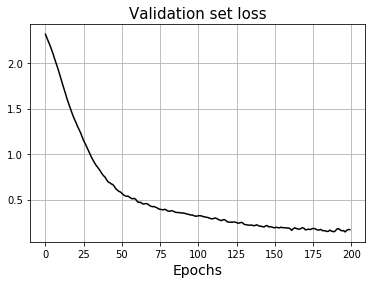

In [88]:
plt.plot(hist.history['val_loss'],color='k')
plt.title("Validation set loss",fontsize=15)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.show()

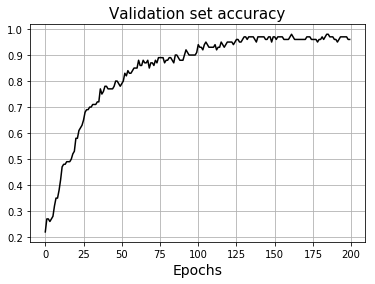

In [89]:
plt.plot(hist.history['val_acc'],color='k')
plt.title("Validation set accuracy",fontsize=15)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.show()

In [91]:
hist.params

{'batch_size': 32,
 'epochs': 200,
 'steps': None,
 'samples': 300,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

## What type of bin size estimator is best?

In [40]:
bin_estimators=[10,20,50,'fd','scott','doane','rice','sturges','sqrt']

In [41]:
def prepare_input(df):
    y=df['Type']
    num_classes = len(df['Type'].unique())
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_y)
    y = keras.utils.to_categorical(encoded_y,num_classes=num_classes)
    
    X=[]
    for i in range(n_input):
        X.append(df['Histogram'][i])
    X=np.array(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    input_dim=X.shape[1]
    
    return (X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes)

In [93]:
def make_NN_model(input_dim, num_classes, n_hidden_layers=2,layer_architecture=[5,5],
                  dropout_prob=0.25,activation_func='relu', learning_rate=0.01):
    """
    Builds a neural net model, assigns an optimizer, and compiles the model for running
    """
    model = build_NN_model(input_dim=input_dim,num_classes=num_classes,n_hidden_layers=n_hidden_layers,
                          layer_architecture=layer_architecture,dropout_prob=dropout_prob,activation_func=activation_func)    
    
    optimizer=keras.optimizers.adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [96]:
def run_NN(model,X_train,y_train,X_val,y_val,num_epochs=100,batch_size=32,plot_loss=False):
    """
    Runs a given model, saves best model/weight as checkpoint, and plots validation set loss if user wants
    Returns the history object
    """
    # save best model as checkpointer
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, 
                                   save_best_only=True)
    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(X_val, y_val), callbacks=[checkpointer], 
              verbose=0, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['val_acc'],color='k')
        plt.title("Validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.show()
    
    return hist

In [97]:
n_input=500
n_sample=300

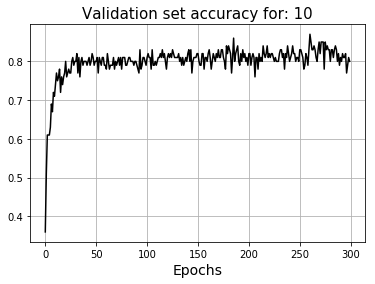

Finished evaluation of 10


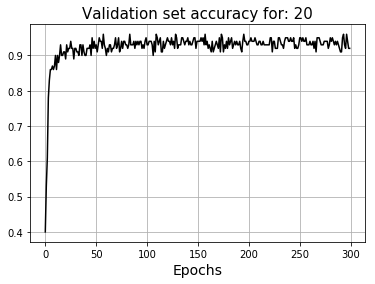

Finished evaluation of 20


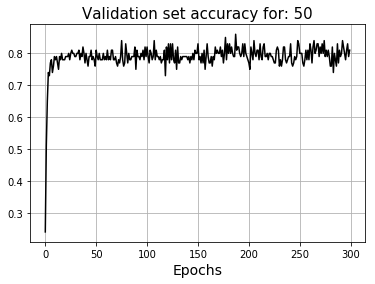

Finished evaluation of 50


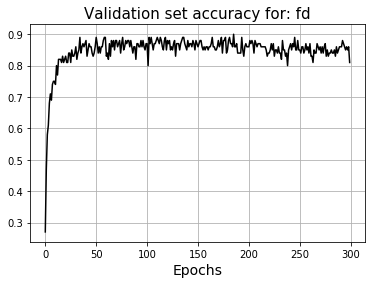

Finished evaluation of fd


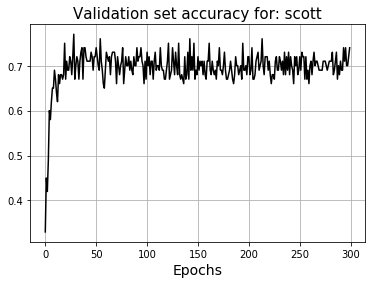

Finished evaluation of scott


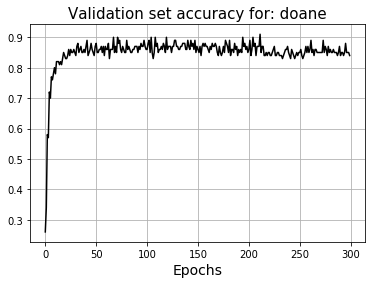

Finished evaluation of doane


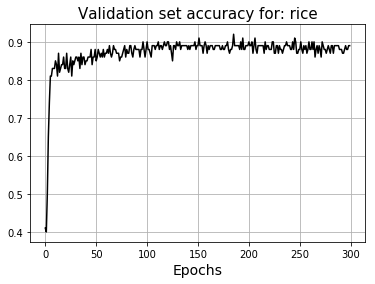

Finished evaluation of rice


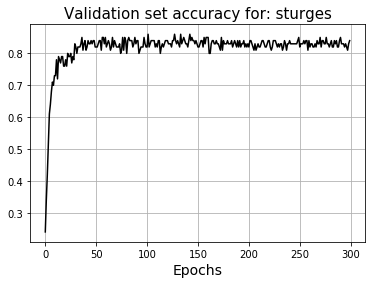

Finished evaluation of sturges


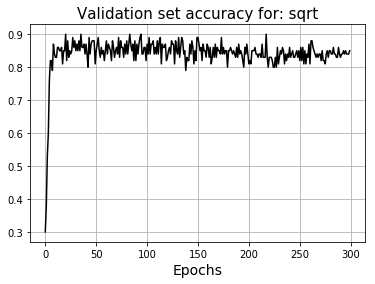

Finished evaluation of sqrt

{'10': 0.74, '20': 0.89, '50': 0.89, 'fd': 0.84, 'scott': 0.66, 'doane': 0.86, 'rice': 0.92, 'sturges': 0.91, 'sqrt': 0.89}


In [99]:
test_score={}
for b in bin_estimators:
    df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=b)
    #print(df['Histogram'][0].shape)
    X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes=prepare_input(df)
    #print(len(X[0]))
    model=make_NN_model(input_dim=input_dim,num_classes=num_classes,n_hidden_layers=2,layer_architecture=[20,20],
                        learning_rate=0.01)
    hist=run_NN(model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,num_epochs=300)
    score=model.evaluate(X_test, y_test,verbose=0)[1]
    test_score[str(b)]=score
    plt.plot(hist.history['val_acc'],color='k')
    plt.title(f"Validation set accuracy for: {b}",fontsize=15)
    plt.grid(True)
    plt.xlabel("Epochs",fontsize=14)
    plt.show()
    print(f"Finished evaluation of {b}")
print()
print(test_score)

### Testing performance for various bin size of the histogram

In [101]:
n_input=500
n_sample=1000

In [102]:
bin_size=[i*5 for i in range(1,31)]
test_score=[]
for b in bin_size:
    df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=b)
    #print(df['Histogram'][0].shape)
    X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes=prepare_input(df)
    #print(len(X[0]))
    model=make_NN_model(input_dim=input_dim,num_classes=num_classes,n_hidden_layers=2,
                        layer_architecture=[20,20],learning_rate=0.01)
    hist=run_NN(model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,num_epochs=300)
    score=model.evaluate(X_test, y_test,verbose=0)[1]
    test_score.append(score)
    print("Done for bin size: ", b)
print()
test_score=np.array(test_score)
bin_size=np.array(bin_size)

Done for bin size:  5
Done for bin size:  10
Done for bin size:  15
Done for bin size:  20
Done for bin size:  25
Done for bin size:  30
Done for bin size:  35
Done for bin size:  40
Done for bin size:  45
Done for bin size:  50
Done for bin size:  55
Done for bin size:  60
Done for bin size:  65
Done for bin size:  70
Done for bin size:  75
Done for bin size:  80
Done for bin size:  85
Done for bin size:  90
Done for bin size:  95
Done for bin size:  100
Done for bin size:  105
Done for bin size:  110
Done for bin size:  115
Done for bin size:  120
Done for bin size:  125
Done for bin size:  130
Done for bin size:  135
Done for bin size:  140
Done for bin size:  145
Done for bin size:  150



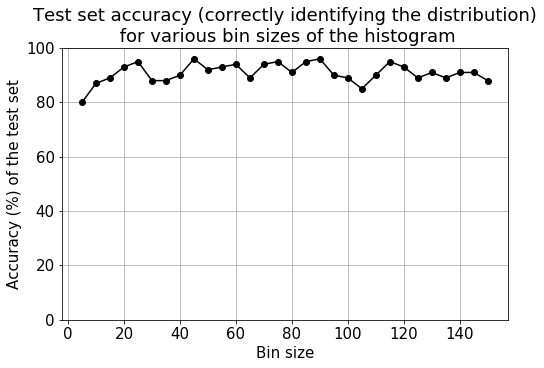

In [103]:
plt.figure(figsize=(8,5))
plt.plot(bin_size,test_score*100,color='k',marker='o')
plt.title("Test set accuracy (correctly identifying the distribution)\n for various bin sizes of the histogram",fontsize=18)
plt.grid(True)
plt.xlabel("Bin size",fontsize=15)
plt.ylabel("Accuracy (%) of the test set",fontsize=15)
plt.ylim(0,100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()